In [14]:
!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()



Colab mode enabled.


In [15]:
import pandas as pd
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
#unzip the data 
!unzip Bike-Sharing-Dataset.zip

--2021-12-14 01:03:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip.1’

Bike-Sharing-Datase 100%[===================>] 273.43K   527KB/s    in 0.5s    

2021-12-14 01:03:26 (527 KB/s) - ‘Bike-Sharing-Dataset.zip.1’ saved [279992/279992]

Archive:  Bike-Sharing-Dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [16]:
#Read the data
dataset = pd.read_csv('hour.csv')
#Drop the columns not needed. 
dataset.drop('casual', axis=1, inplace=True)
dataset.drop('registered', axis=1, inplace=True)
dataset.drop('instant', axis=1, inplace=True)
dataset.drop('dteday', axis=1, inplace=True)
dataset

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [17]:
dataset.shape

 

(17379, 13)

In [18]:
dataset

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [19]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data for Predictions: ' + str(data_unseen.shape))

Data for Modeling: (15641, 13)
Unseen Data for Predictions: (1738, 13)


In [53]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'cnt', categorical_features = ['season', 'yr', 'mnth', 'hr'],  session_id=123) 

,Description,Value
0,session_id,123
1,Target,cnt
2,Original Data,"(15641, 13)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10948, 58)"


In [54]:
data

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,3,1,7,17,0,4,1,1,0.86,0.7879,0.41,0.0000,771
1,3,1,7,11,0,6,0,1,0.84,0.7424,0.39,0.2239,457
2,3,1,9,9,0,3,1,1,0.54,0.5152,0.60,0.2537,362
3,3,0,7,7,0,1,1,1,0.70,0.6667,0.74,0.2537,317
4,1,1,1,14,0,5,1,1,0.46,0.4545,0.36,0.1940,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15636,2,0,5,10,0,0,0,2,0.48,0.4697,0.63,0.1940,264
15637,2,0,5,17,0,3,1,1,0.40,0.4091,0.71,0.2537,410
15638,1,1,3,10,0,0,0,1,0.32,0.3030,0.49,0.2836,218
15639,2,0,4,16,0,5,1,1,0.34,0.3030,0.46,0.4179,167


In [55]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.181470e+01,2.275812e+03,4.769710e+01,9.304000e-01,0.5430,6.427000e-01,0.186
et,Extra Trees Regressor,2.871650e+01,2.295277e+03,4.789270e+01,9.299000e-01,0.3914,3.752000e-01,6.279
rf,Random Forest Regressor,3.341260e+01,2.822968e+03,5.310360e+01,9.138000e-01,0.4758,5.405000e-01,6.337
dt,Decision Tree Regressor,4.398100e+01,5.471721e+03,7.391190e+01,8.327000e-01,0.5739,5.716000e-01,0.123
gbr,Gradient Boosting Regressor,5.965420e+01,6.910015e+03,8.308850e+01,7.887000e-01,0.8079,1.458100e+00,1.225
ridge,Ridge Regression,7.534720e+01,1.033586e+04,1.016345e+02,6.837000e-01,1.0337,2.850300e+00,0.030
br,Bayesian Ridge,7.534410e+01,1.033569e+04,1.016337e+02,6.837000e-01,1.0334,2.848600e+00,0.062
knn,K Neighbors Regressor,7.010280e+01,1.042925e+04,1.020934e+02,6.811000e-01,0.9283,2.205200e+00,0.567
huber,Huber Regressor,7.225630e+01,1.081421e+04,1.039586e+02,6.691000e-01,0.9660,2.422700e+00,0.538
lasso,Lasso Regression,7.668010e+01,1.100201e+04,1.048606e+02,6.635000e-01,1.0170,2.576200e+00,0.035


In [56]:
models()


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [57]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,117.4269,19021.8737,137.9198,0.4150,1.5261,7.6499
1,117.5618,19237.0311,138.6976,0.3735,1.5198,7.4151
2,124.5859,21558.1487,146.8269,0.3750,1.5516,7.8083
3,112.9382,18184.6480,134.8505,0.4196,1.4750,7.2697
4,121.4601,20374.0567,142.7377,0.4011,1.6399,9.1736
5,117.2242,19249.0577,138.7410,0.4388,1.4798,6.4481
6,116.4658,19266.2544,138.8029,0.3759,1.4592,6.2591
7,123.7617,21172.7615,145.5086,0.3492,1.5588,7.8427
8,120.4307,20470.6770,143.0758,0.3876,1.5103,6.9336
9,111.7034,17659.0866,132.8875,0.4666,1.4804,6.2596


In [58]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [59]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,32.2212,2301.7109,47.9761,0.9292,0.5289,0.6642
1,31.6309,2250.7826,47.4424,0.9267,0.5647,0.6948
2,30.8263,2262.8564,47.5695,0.9344,0.5185,0.6113
3,31.8129,2341.6212,48.3903,0.9253,0.5296,0.6522
4,31.0696,2283.8505,47.7896,0.9329,0.5447,0.6553
5,32.8709,2445.7542,49.4546,0.9287,0.5438,0.6110
6,31.9293,2088.4036,45.6991,0.9323,0.5247,0.5733
7,32.1229,2271.7801,47.6632,0.9302,0.5788,0.6929
8,32.7866,2284.2346,47.7937,0.9317,0.5794,0.6762
9,30.8763,2227.1310,47.1925,0.9327,0.5171,0.5961


In [60]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,43.0530,5054.6968,71.0964,0.8445,0.5828,0.6151
1,45.3626,5986.7909,77.3744,0.8050,0.5947,0.6645
2,43.9123,5420.8603,73.6265,0.8428,0.5765,0.5474
3,44.1489,4990.4776,70.6433,0.8407,0.5857,0.5507
4,45.9553,6480.6146,80.5023,0.8095,0.6011,0.6963
5,44.8192,5758.7315,75.8863,0.8321,0.5637,0.5290
6,41.8858,5269.7068,72.5927,0.8293,0.5459,0.4804
7,43.0539,5253.7790,72.4830,0.8385,0.5630,0.5926
8,44.4072,5376.8448,73.3270,0.8391,0.5718,0.5793
9,43.2121,5124.7112,71.5871,0.8452,0.5535,0.4604


In [61]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,106.6359,17511.3463,132.3304,0.4615,1.4176,5.9772
1,107.3004,17253.3120,131.3519,0.4381,1.4118,5.9008
2,108.5714,18897.2904,137.4674,0.4521,1.4137,5.8764
3,104.3016,17107.1471,130.7943,0.4540,1.3724,5.8126
4,110.8969,19120.1538,138.2756,0.4379,1.5282,7.3182
5,111.0692,19301.6680,138.9304,0.4373,1.3882,5.3276
6,108.0604,18613.8639,136.4326,0.3970,1.3640,5.1053
7,109.8469,18382.1319,135.5807,0.4350,1.4254,6.0292
8,111.9028,19431.0409,139.3953,0.4187,1.4237,5.7399
9,105.9321,17616.4876,132.7271,0.4678,1.3906,5.1679


In [62]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=90, random_state=123)


In [63]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [64]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,29.9757,2146.3919,46.3292,0.9340,0.5310,0.6011
1,29.0512,2038.8613,45.1538,0.9336,0.5417,0.5643
2,29.2828,2140.3175,46.2636,0.9379,0.5028,0.5747
3,30.6555,2262.5406,47.5662,0.9278,0.5135,0.5870
4,29.1987,2099.4496,45.8198,0.9383,0.5559,0.6940
5,30.8616,2224.0624,47.1600,0.9352,0.5105,0.5461
6,29.1099,1911.6201,43.7221,0.9381,0.4591,0.5089
7,29.2987,2068.0158,45.4754,0.9364,0.5191,0.6003
8,29.9601,2086.7072,45.6805,0.9376,0.5161,0.5748
9,29.5378,2158.9133,46.4641,0.9348,0.4829,0.4717


In [66]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [65]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,70.1557,9451.0191,97.2164,0.7093,1.1178,3.0539
1,70.6288,10036.6167,100.1829,0.6731,1.0803,2.8507
2,70.2417,9446.7325,97.1943,0.7261,1.1229,3.0773
3,70.4364,9206.8923,95.9526,0.7062,1.1113,3.2363
4,72.2316,9715.2568,98.5660,0.7144,1.1955,3.5669
5,70.8797,9716.3586,98.5716,0.7167,1.0794,2.7136
6,69.9566,9701.4581,98.4960,0.6857,1.0219,2.2846
7,70.1726,9236.0081,96.1042,0.7161,1.0881,2.8339
8,76.8463,10787.5281,103.8630,0.6773,1.1332,2.9984
9,69.9075,9477.0804,97.3503,0.7137,1.1085,2.7282


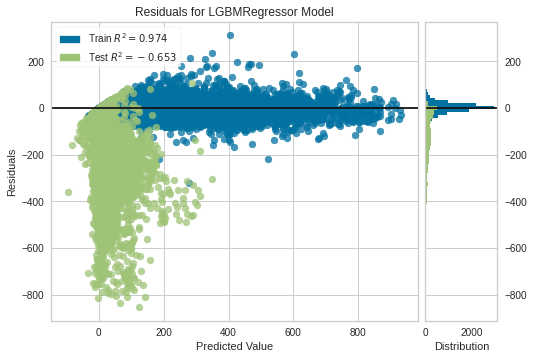

In [67]:
plot_model(tuned_lightgbm)

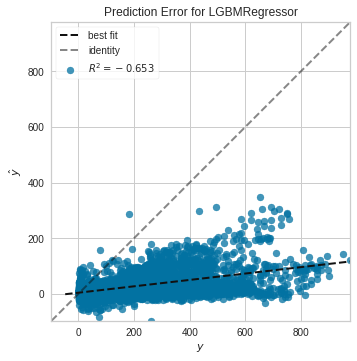

In [68]:
plot_model(tuned_lightgbm, plot = 'error')

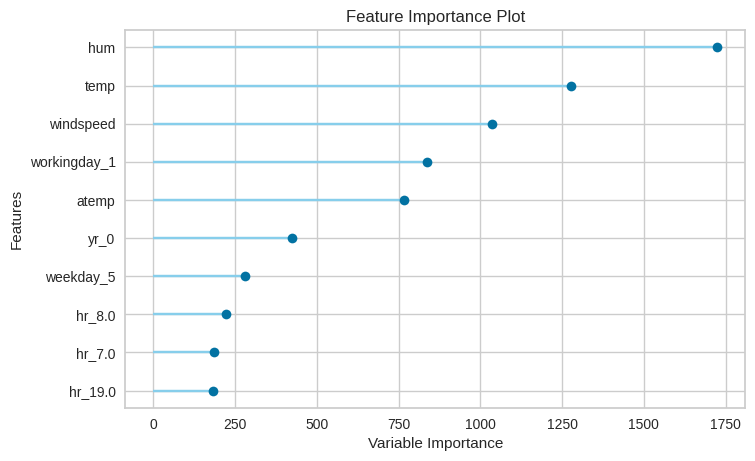

In [69]:
plot_model(tuned_lightgbm, plot='feature')

In [70]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [71]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,166.6871,53784.0867,231.914,-0.6529,2.2596,1.1171


In [72]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [73]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [74]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,75.8017,10786.6255,103.8587,0.6685,1.0951,3.1465


In [75]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Label
0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,27.001043
1,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1,34.081233
2,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8,15.980569
3,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,84,89.460053
4,1,0,1,18,0,6,0,3,0.42,0.4242,0.88,0.2537,35,56.735695


In [76]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.cnt, unseen_predictions.Label, 'R2')

0.4577

In [77]:
save_model(final_lightgbm,'Final LightGBM Model 25Nov2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['season', 'yr',
                                                             'mnth', 'hr'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='cnt',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_we

In [78]:
saved_final_lightgbm = load_model('Final LightGBM Model 25Nov2020')

Transformation Pipeline and Model Successfully Loaded


In [79]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)
new_prediction.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Label
0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,27.001043
1,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1,34.081233
2,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8,15.980569
3,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,84,89.460053
4,1,0,1,18,0,6,0,3,0.42,0.4242,0.88,0.2537,35,56.735695


In [80]:
from pycaret.utils import check_metric
check_metric(new_prediction.cnt, new_prediction.Label, 'R2')

0.4577